## Tensorflow MNIST with Convolutions
---

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

class ModelCallback(tf.keras.callbacks.Callback):
    def __init__(self, loss=0.0, acc=0.0):
        self.loss = loss
        self.acc = acc
    def on_epoch_end(self, epoch, logs={}):
        if (self.loss>0.0 and logs['loss']<self.loss) or \
           (self.acc>0.0 and logs['acc']>self.acc):
            self.model.stop_training = True

# Tensorflow/CUDA session config
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)    

# data
mnist = tf.keras.datasets.mnist
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

train_data = train_data/255.0
test_data = test_data/255.0

# data reshape for convolutions: (60.000, 28, 28) --> (60.000, 28, 28, 1)
train_data = train_data.reshape(60000, 28, 28, 1)
test_data = test_data.reshape(10000, 28, 28, 1)

# model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# train
callbacks = ModelCallback(acc=0.998)
model.fit(train_data, train_labels, epochs=20, callbacks=[callbacks])

# evaluate
model.evaluate(test_data, test_labels) 

/home/zeroth/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/zeroth/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/zeroth/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/zeroth/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/20
60000/60000 [==============================] - 9s 147us/sample - loss: 0.1339 - acc: 0.9593
Epoch 2/20
60000/60000 [==============================] - 7s 119us/sample - loss: 0.0456 - acc: 0.9864
Epoch 3/20
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0272 - acc: 0.9917
Epoch 4/20
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0172 - acc: 0.9945
Epoch 5/20
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0123 - acc: 0.9960
Epoch 6/20
60000/60000 [==============================] - 7s 120us/sample - loss: 0.0082 - acc: 0.9972
Epoch 7/20
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0067 - acc: 0.9980
Epoch 8/20
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0064 - acc: 0.9980
Epoch 9/20
10000/10000 [==============================] - 

[0.051106061509034816, 0.9871]

---
### Predictions

prediction: 3 6 4 4 4 2 5 7 6 6 

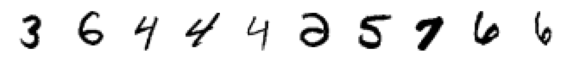

In [2]:
import numpy as np
import matplotlib.pyplot as plt

predictions = model.predict(test_data)

fig, axis = plt.subplots(nrows=1, ncols=10, figsize=(10,1))

nums = []
for i in range(10):
    nums.append(np.random.randint(0, test_data.shape[0]+1))
    axis[i].imshow(test_data[nums[i],:].reshape(28, 28, order="F"), cmap="gray_r")
    axis[i].axis("off")

print("prediction:", end=" ")
for i in nums:
    print(np.argmax(predictions[i]), end=" ")